<a href="https://colab.research.google.com/github/Luis-Alatrista/an-lisis-tiendas/blob/main/Copia_de_AluraStoreLatam_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importación de datos



In [ ]:

import pandas as pd
import numpy as np
import os

# Configuración de redondeo a 10 decimales
pd.options.display.float_format = lambda x: f'{x:.10f}'

base_dir = "/mnt/data/tiendas"

# Cargar CSVs locales
tienda1 = pd.read_csv(os.path.join(base_dir, "tienda_1.csv"))
tienda2 = pd.read_csv(os.path.join(base_dir, "tienda_2.csv"))
tienda3 = pd.read_csv(os.path.join(base_dir, "tienda_3.csv"))
tienda4 = pd.read_csv(os.path.join(base_dir, "tienda_4.csv"))

# Unir todas las tiendas en un solo DataFrame
tienda1["tienda"] = "tienda_1"
tienda2["tienda"] = "tienda_2"
tienda3["tienda"] = "tienda_3"
tienda4["tienda"] = "tienda_4"

data = pd.concat([tienda1, tienda2, tienda3, tienda4], ignore_index=True)
data.head()


,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon,tienda
0,Asistente virtual,Electrónicos,164300.0000000000,6900.0000000000,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.6097100000,-74.0817500000,tienda_1
1,Mesa de comedor,Muebles,192300.0000000000,8400.0000000000,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.2518400000,-75.5635900000,tienda_1
2,Juego de mesa,Juguetes,209600.0000000000,15900.0000000000,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.3997200000,-75.5144400000,tienda_1
3,Microondas,Electrodomésticos,757500.0000000000,41000.0000000000,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.4372200000,-76.5225000000,tienda_1
4,Silla de oficina,Muebles,335200.0000000000,20200.0000000000,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.2518400000,-75.5635900000,tienda_1


#1. Análisis de facturación



Ingreso total por tienda:
     tienda                Precio
0  tienda_1 1150880400.0000000000
1  tienda_2 1116343500.0000000000
2  tienda_3 1098019600.0000000000
3  tienda_4 1038375700.0000000000


<AxesSubplot: title={'center': 'Facturación por tienda'}, xlabel='tienda'>

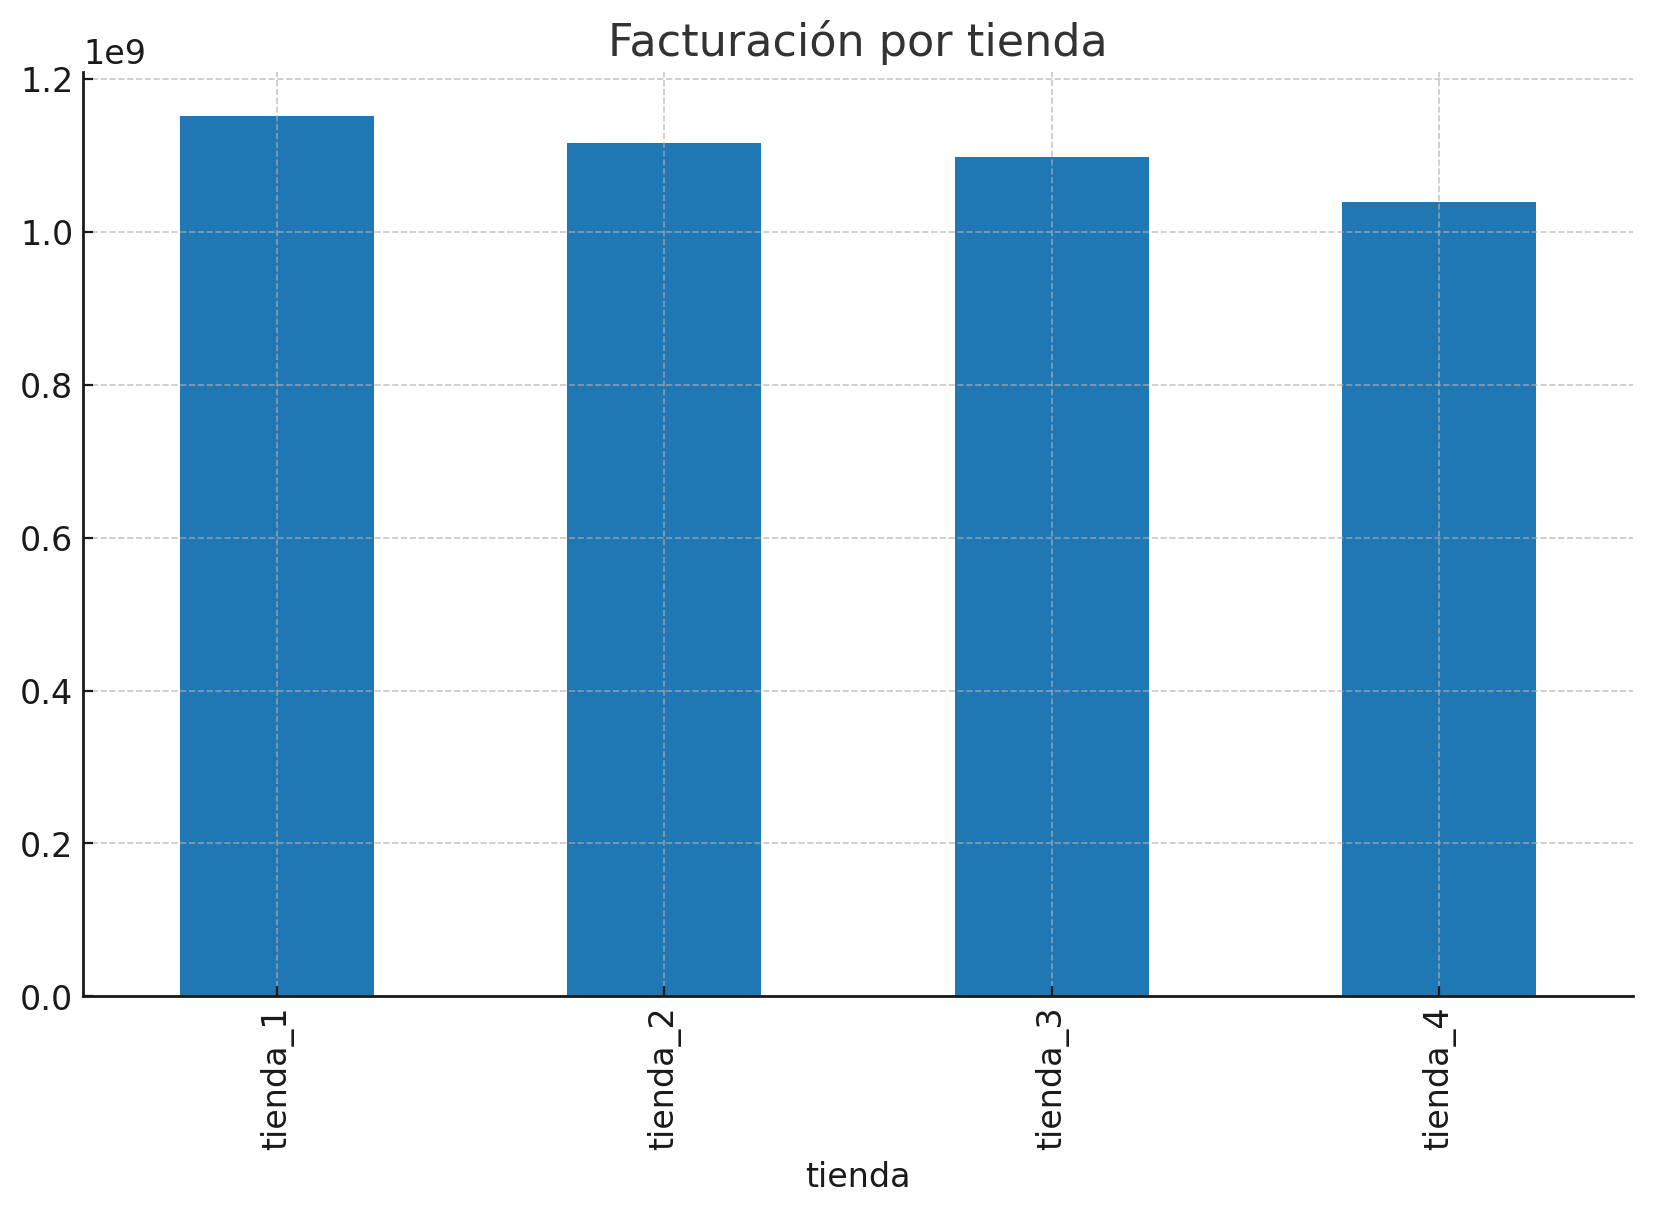

In [ ]:
import numpy as np
pd.options.display.float_format = lambda x: f'{x:.10f}'


facturacion = data.groupby("tienda")["Precio"].sum().reset_index()
print("Ingreso total por tienda:")
print(facturacion)

facturacion.plot(kind="bar", x="tienda", y="Precio", legend=False, title="Facturación por tienda")


# 2. Ventas por categoría

Ventas por categoría:
    Categoría del Producto                Precio
0  Artículos para el hogar   57579800.0000000000
1     Deportes y diversión  142977700.0000000000
2        Electrodomésticos 1324751100.0000000000
3             Electrónicos 1660576500.0000000000
4   Instrumentos musicales  348772600.0000000000
5                 Juguetes   73604400.0000000000
6                   Libros   37696100.0000000000
7                  Muebles  757661000.0000000000


<AxesSubplot: title={'center': 'Ventas por categoría'}, ylabel='Categoría del Producto'>

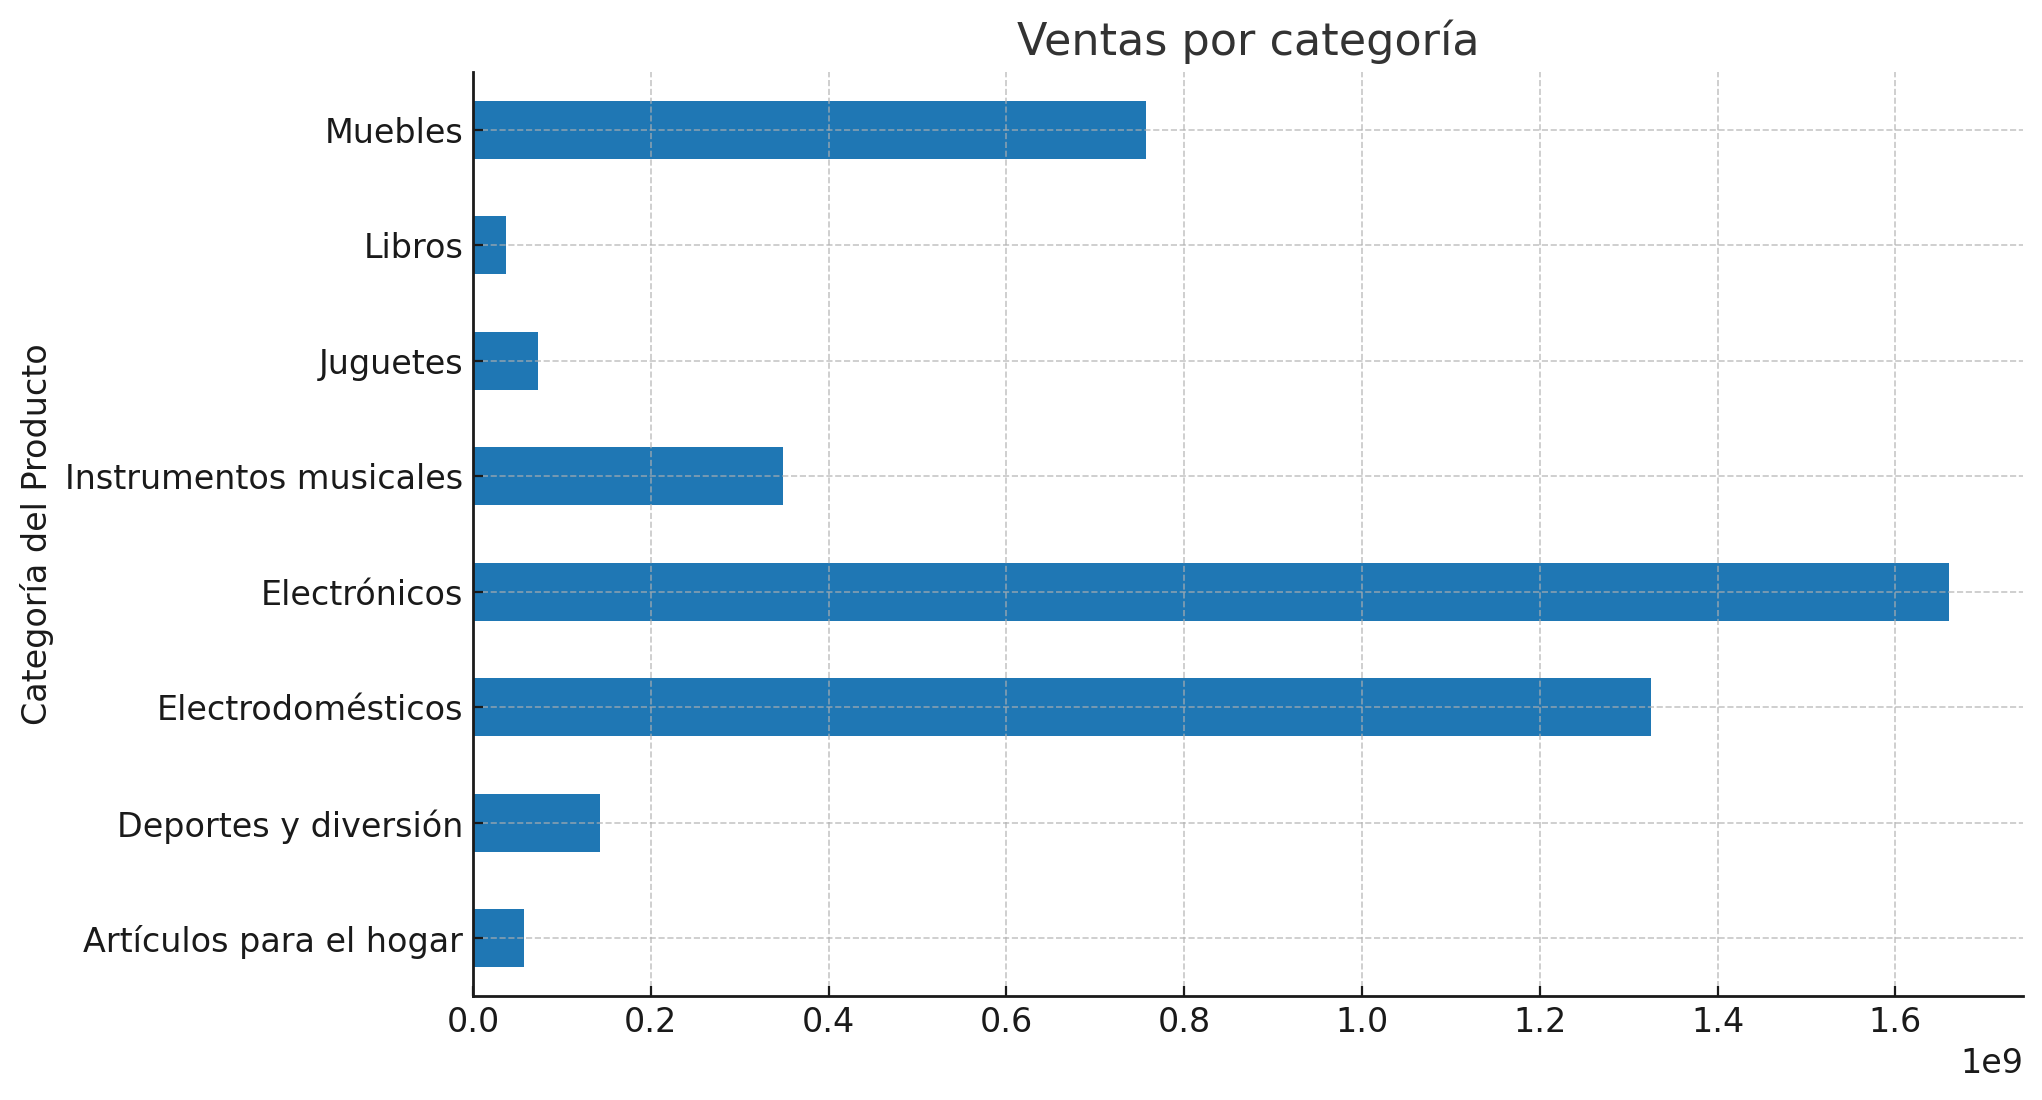

In [ ]:
import numpy as np
pd.options.display.float_format = lambda x: f'{x:.10f}'


ventas_categoria = data.groupby("Categoría del Producto")["Precio"].sum().reset_index()
print("Ventas por categoría:")
print(ventas_categoria)

ventas_categoria.plot(kind="barh", x="Categoría del Producto", y="Precio", legend=False, title="Ventas por categoría")


# 3. Calificación promedio de la tienda


Calificación promedio por tienda:
     tienda  Calificación
0  tienda_1  3.9766850360
1  tienda_2  4.0373039423
2  tienda_3  4.0483255617
3  tienda_4  3.9957591179


<AxesSubplot: title={'center': 'Calificación promedio por tienda'}, xlabel='tienda'>

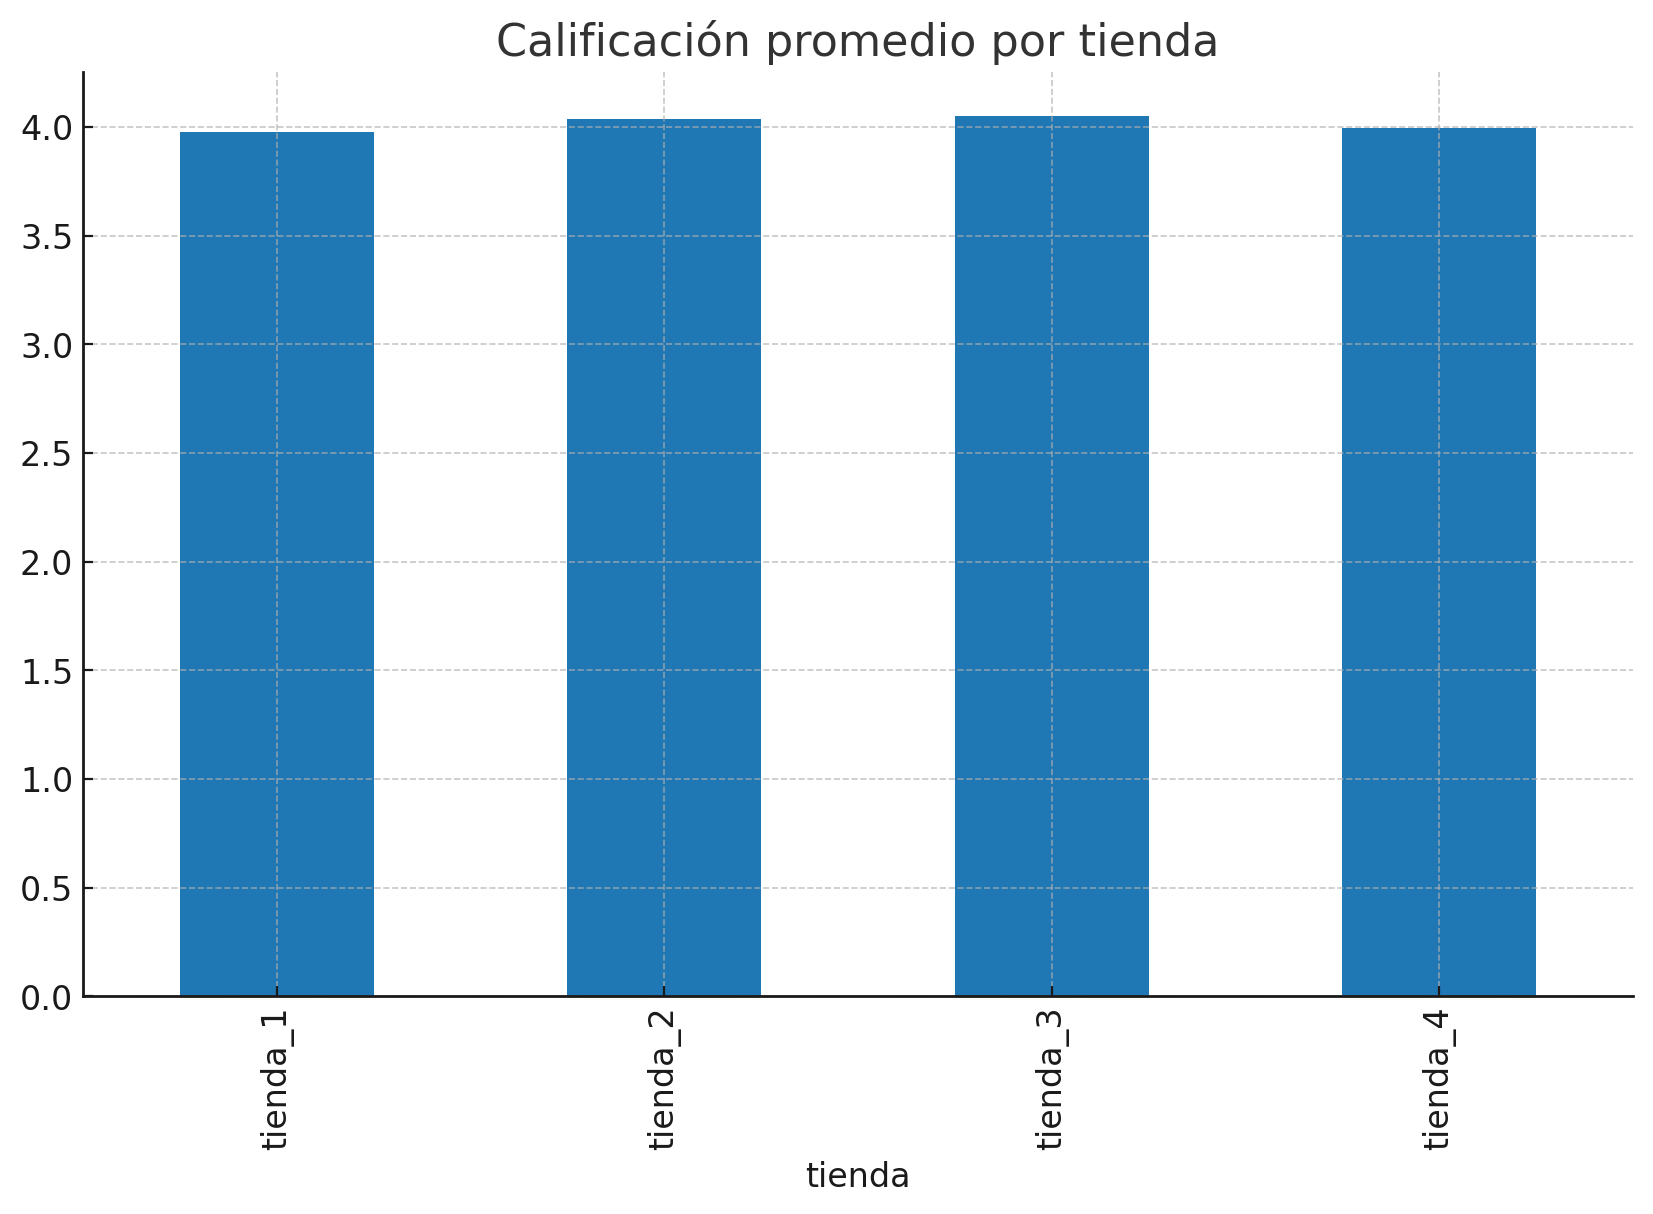

In [ ]:
import numpy as np
pd.options.display.float_format = lambda x: f'{x:.10f}'


calificacion_promedio = data.groupby("tienda")["Calificación"].mean().reset_index()
print("Calificación promedio por tienda:")
print(calificacion_promedio)

calificacion_promedio.plot(kind="bar", x="tienda", y="Calificación", legend=False, title="Calificación promedio por tienda")


# 4. Productos más y menos vendidos

Productos más vendidos:
                    Producto  Cantidad
0              Mesa de noche       210
1                 Microondas       206
2  Carrito de control remoto       206
3                    Batería       203
4                  Cama king       201

Productos menos vendidos:
                       Producto  Cantidad
46  Ciencia de datos con Python       166
47           Guitarra eléctrica       165
48                      Mochila       163
49    Auriculares con micrófono       158
50                 Celular ABXY       157


<AxesSubplot: title={'center': 'Top 5 productos más vendidos'}, xlabel='Producto'>

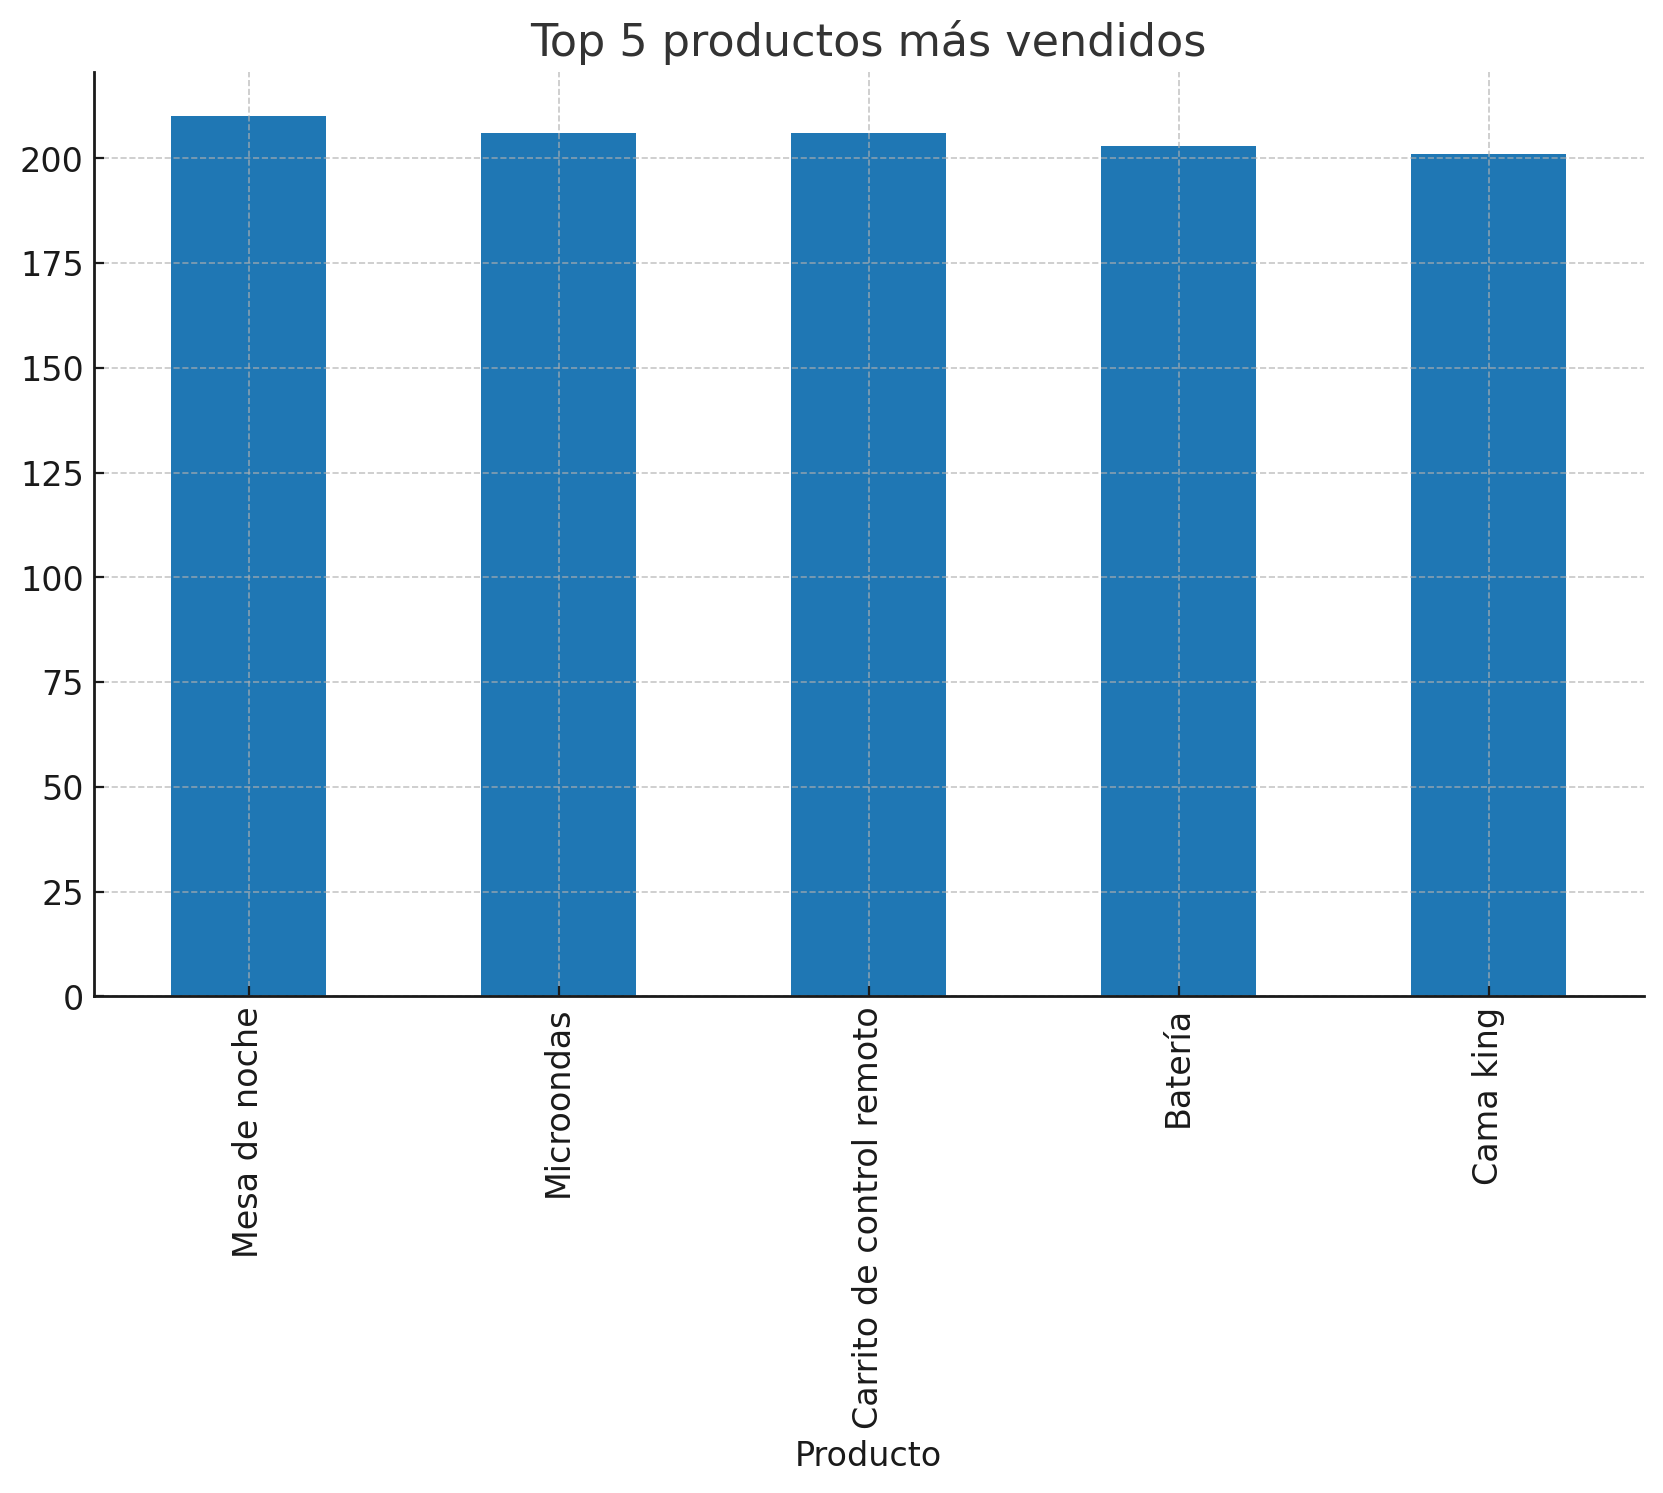

In [ ]:
import numpy as np
pd.options.display.float_format = lambda x: f'{x:.10f}'


productos_vendidos = data["Producto"].value_counts().reset_index()
productos_vendidos.columns = ["Producto", "Cantidad"]
print("Productos más vendidos:")
print(productos_vendidos.head())

print("\nProductos menos vendidos:")
print(productos_vendidos.tail())

productos_vendidos.head(5).plot(kind="bar", x="Producto", y="Cantidad", legend=False, title="Top 5 productos más vendidos")


# 5. Envío promedio por tienda

Envío promedio por tienda:
     tienda   Costo de envío
0  tienda_1 26018.6095803306
1  tienda_2 25216.2356930903
2  tienda_3 24805.6803730394
3  tienda_4 23459.4571670908


<AxesSubplot: title={'center': 'Envío promedio por tienda'}, xlabel='tienda'>

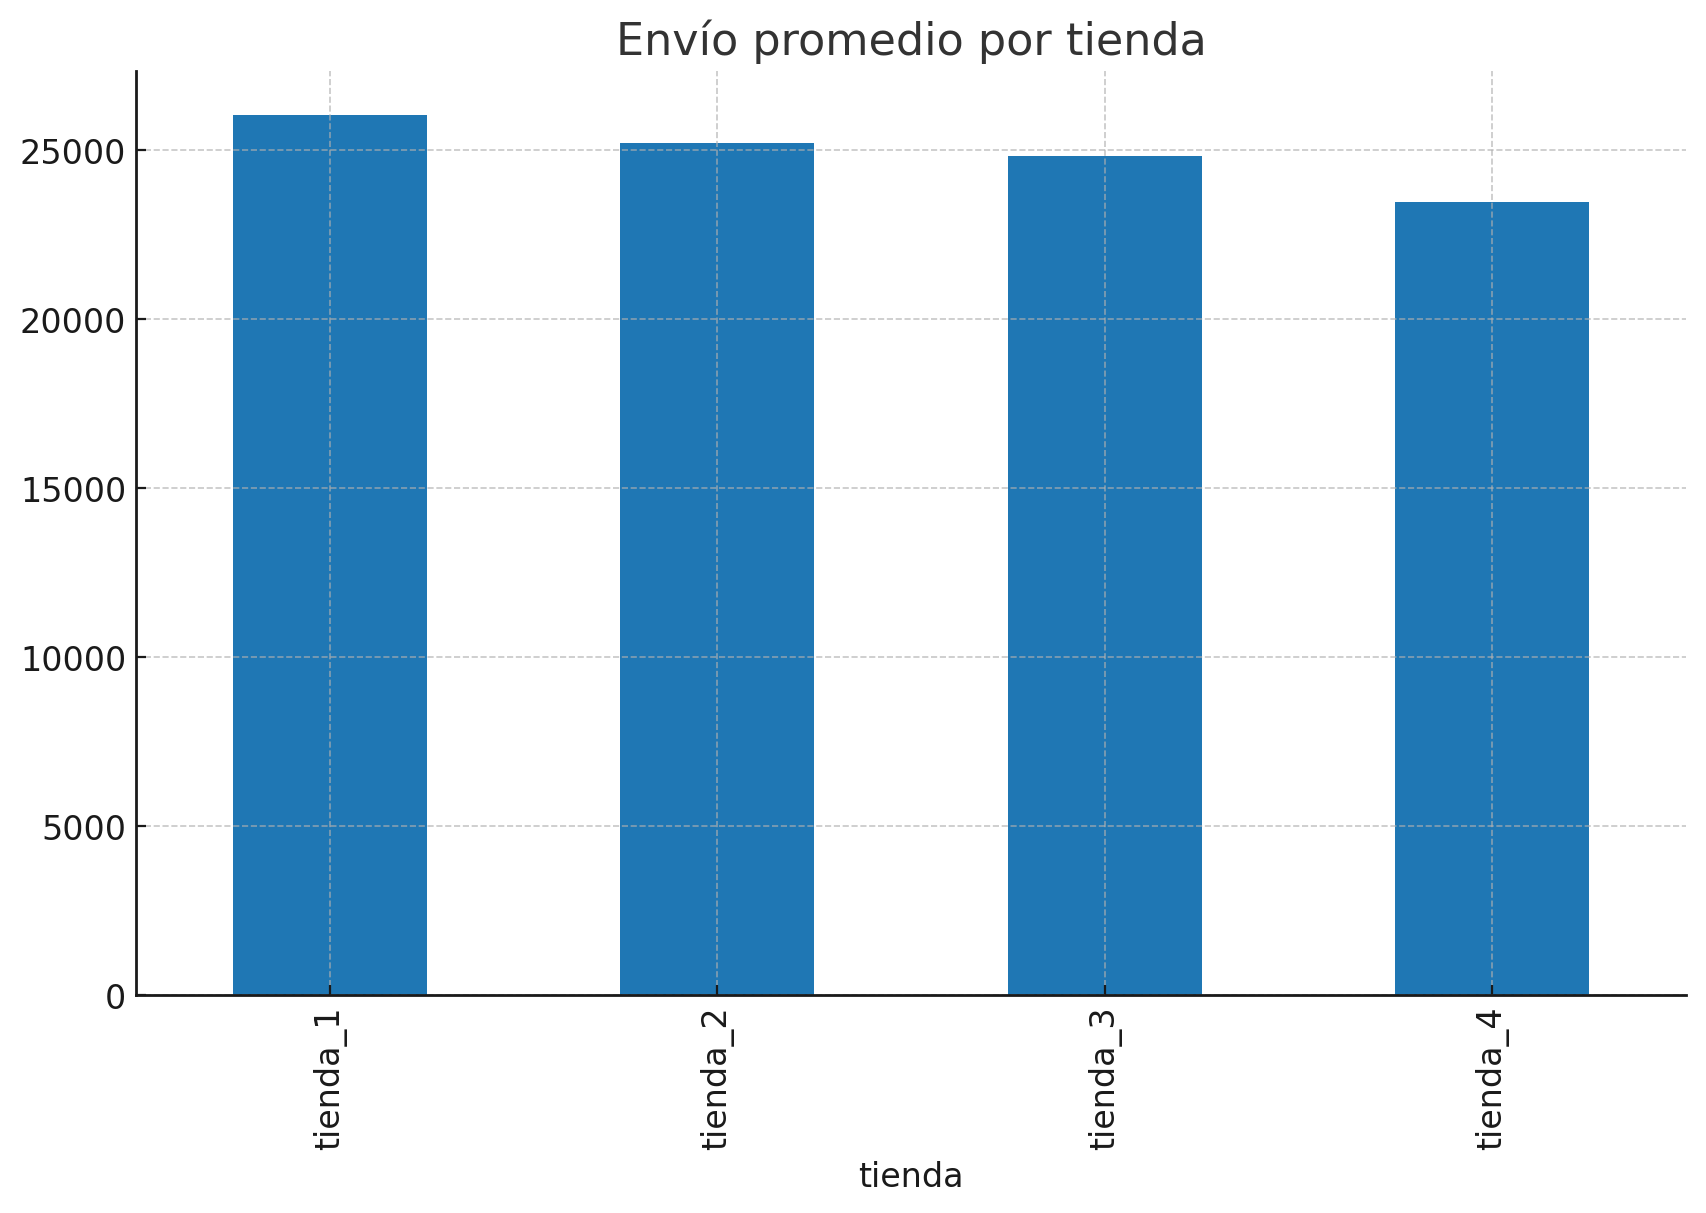

In [ ]:
import numpy as np
pd.options.display.float_format = lambda x: f'{x:.10f}'


envio_promedio = data.groupby("tienda")["Costo de envío"].mean().reset_index()
print("Envío promedio por tienda:")
print(envio_promedio)

envio_promedio.plot(kind="bar", x="tienda", y="Costo de envío", legend=False, title="Envío promedio por tienda")


6. RECOMENDACIÓN

Según el análisis la tienda a recomendar para verder es la número 4, ya que tiene la facturación más baja, la calificación promedio más baja que la mayoría, la candidata es latienda 4 para venderla para reinvertir en otro negocio.